# **Implement Dijkstra's Algorithm**
MSDS 432 Module 7

Nameyeh Alam

In [30]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import string
import warnings
warnings.filterwarnings("ignore", category=Warning)
import time

#### 1. First, use the breadth-first algorithm to find the quickest way to get to L.A from NYC and calculate the time that it will take to get to L.A. from NYC using the breadth first algorithm.  (Even though BFS does not use weighted edges, we will indirectly use them to calculate the time of the route).


In [31]:
# create graph 
graph = {}
# nodes
nodes = ['NYC','DC','Pittsburgh','Indianapolis',
         'Atlanta','Kansas City','Cincinnati',
         'New Orleans','Denver','St Louis',
         'Dallas','Salt Lake City','Oklahoma City',
         'Albuquerque','Las Vegas','Phoenix',
         'San Diego','Los Angeles']
# create nodes in graph 
for x in nodes:
    graph[x] = {}
    
# check graph 
graph

{'NYC': {},
 'DC': {},
 'Pittsburgh': {},
 'Indianapolis': {},
 'Atlanta': {},
 'Kansas City': {},
 'Cincinnati': {},
 'New Orleans': {},
 'Denver': {},
 'St Louis': {},
 'Dallas': {},
 'Salt Lake City': {},
 'Oklahoma City': {},
 'Albuquerque': {},
 'Las Vegas': {},
 'Phoenix': {},
 'San Diego': {},
 'Los Angeles': {}}

In [32]:
# node - NYC
graph['NYC']['DC'] = 2
graph['NYC']['Pittsburgh'] = 7
graph['NYC']['Indianapolis'] = 11

# node - DC
graph['DC']['Atlanta'] = 2

# node - Indianapolis
graph['Indianapolis']['Kansas City'] = 8

# node - Pittsburgh
graph['Pittsburgh']['Cincinnati'] = 6

# node - Atlanta
graph['Atlanta']['New Orleans'] = 2

# node - Kansas City
graph['Kansas City']['Denver'] = 7

# node - Cincinnati
graph['Cincinnati']['St Louis'] = 8

# node - New Orleans
graph['New Orleans']['Dallas'] = 2

# node - Denver
graph['Denver']['Salt Lake City'] = 6

# node - St Louis
graph['St Louis']['Oklahoma City'] = 7

# node - Dallas
graph['Dallas']['Albuquerque'] = 2

# node - Oklahoma City
graph['Oklahoma City']['Albuquerque'] = 9

# node - Salt Lake City
graph['Salt Lake City']['Las Vegas'] = 9

# node - Albuquerque
graph['Albuquerque']['Phoenix'] = 2

# node - Phoenix
graph['Phoenix']['Las Vegas'] = 2
graph['Phoenix']['San Diego'] = 5

# node - Las Vegas
graph['Las Vegas']['San Diego'] = 2
graph['Las Vegas']['Los Angeles'] = 5

# node - San Diego
graph['San Diego']['Los Angeles'] = 2

# check graph 
graph

{'NYC': {'DC': 2, 'Pittsburgh': 7, 'Indianapolis': 11},
 'DC': {'Atlanta': 2},
 'Pittsburgh': {'Cincinnati': 6},
 'Indianapolis': {'Kansas City': 8},
 'Atlanta': {'New Orleans': 2},
 'Kansas City': {'Denver': 7},
 'Cincinnati': {'St Louis': 8},
 'New Orleans': {'Dallas': 2},
 'Denver': {'Salt Lake City': 6},
 'St Louis': {'Oklahoma City': 7},
 'Dallas': {'Albuquerque': 2},
 'Salt Lake City': {'Las Vegas': 9},
 'Oklahoma City': {'Albuquerque': 9},
 'Albuquerque': {'Phoenix': 2},
 'Las Vegas': {'San Diego': 2, 'Los Angeles': 5},
 'Phoenix': {'Las Vegas': 2, 'San Diego': 5},
 'San Diego': {'Los Angeles': 2},
 'Los Angeles': {}}

In [33]:
# BFS
def bfs(graph, start, finish):
    # list to keep track of nodes already processed 
    processed = []
    # list to keep track of which paths need to be searched
    search_queue = [[start]]
    # if same input for start&fin
    if start == finish:
        return "You are already at your destination!"
    # Check all possible paths
    while search_queue:
        # Pop init path off queue
        init_path = search_queue.pop(0)
        # Find the last possible destination on this path
        node = init_path[-1]
        # if not already processed
        if node not in processed:
            neighbors = graph[node]
            # push all neighbors into search queue
            for neighbor in neighbors:
                path = list(init_path)
                path.append(neighbor)
                search_queue.append(path)
                # return path if neighbor=destination
                if neighbor == finish:
                    sep = " --> "
                    travel_time = 0 
                    for i in range(len(path)-1):
                        travel_time += graph[path[i]][path[i+1]]
                        formatted_path = sep.join(path)
                    print(("According to BFS, " + 
                    "the 'best' route is: \n{}. \nThis route will take {} hours"+
                          " and you will drive through {} cities "+
                          "before reaching {}.")
                          .format(formatted_path,
                                  travel_time,
                                  (len(path)-2),
                                   path[-1]))
                    return path, travel_time, (len(path)-2), formatted_path
            # Mark the node as processed
            processed.append(node)
    # if no path exists 
    return "A route to your destination does not exist!!"

#### 2. Print the route

In [34]:
bfs_path = bfs(graph, 'NYC', 'Los Angeles')  
print(bfs_path)

According to BFS, the 'best' route is: 
NYC --> Indianapolis --> Kansas City --> Denver --> Salt Lake City --> Las Vegas --> Los Angeles. 
This route will take 46 hours and you will drive through 5 cities before reaching Los Angeles.
(['NYC', 'Indianapolis', 'Kansas City', 'Denver', 'Salt Lake City', 'Las Vegas', 'Los Angeles'], 46, 5, 'NYC --> Indianapolis --> Kansas City --> Denver --> Salt Lake City --> Las Vegas --> Los Angeles')


#### 3. Next, use Dijkstra's algorithm to find the most optimal route to get to L.A from NYC, capture the time that it will take to get to L.A (use the weights in the algorithm assigned to the routes).

In [35]:
def find_lowest_cost_node(costs,processed):
    lowest_cost = float("inf")
    lowest_cost_node = None
    # Go through each node.
    for node in costs:
        cost = costs[node]
        # If it's the lowest cost so far and hasn't been processed yet...
        if cost < lowest_cost and node not in processed:
            # ... set it as the new lowest-cost node.
            lowest_cost = cost
            lowest_cost_node = node
    return lowest_cost_node, lowest_cost

In [36]:
def dijkstras(start, finish):
    # create costs and parents tables
    infinity = float("inf")
    costs = {}
    parents = {}
    for x in graph.keys():
        costs[x] = infinity
        parents[x] = None

    for x in graph[start].keys():
        costs[x] = graph[start][x]
        parents[x] = start
    
    costs[start] = 0            
    processed = [start]
    
    # Find the lowest-cost node that you haven't processed yet.
    node, cost = find_lowest_cost_node(costs, processed)
    # If you've processed all the nodes, this while loop is done.
    while node is not None:
        # Go through all the neighbors of this node.
        neighbors = graph[node]
        for n in neighbors.keys():
            new_cost = cost + neighbors[n]
            # If it's cheaper to get to this neighbor by going through this node...
            if costs[n] > new_cost:
                # ... update the cost for this node.
                costs[n] = new_cost
                # This node becomes the new parent for this neighbor.
                parents[n] = node
        # Mark the node as processed.
        processed.append(node)
        # Find the next node to process, and loop.
        node, cost = find_lowest_cost_node(costs, processed)
        
    current = finish
    path = []
    while parents[current] is not None:
        path = [current] +  path
        current = parents[current]
    if path: 
        path = [current] +  path
        sep = " --> "
        formatted_path = sep.join(path)
        print(("According to Dijkstra's Algorithm, " + 
                "the 'best' route is: \n{}. \nThis route will take {} hours"+
                      " and you will drive through {} cities "+
                      "before reaching {}.")
                      .format(formatted_path,
                              costs[finish],
                              (len(path)-2),
                               path[-1]))
        return  path, costs[finish], (len(path)-2), formatted_path
    else:
        return None

#### 4. Print the route 

In [37]:
da_path = dijkstras('NYC', 'Los Angeles')
# print(da_path)

According to Dijkstra's Algorithm, the 'best' route is: 
NYC --> DC --> Atlanta --> New Orleans --> Dallas --> Albuquerque --> Phoenix --> Las Vegas --> San Diego --> Los Angeles. 
This route will take 18 hours and you will drive through 8 cities before reaching Los Angeles.


#### 5. Compare time of Breadth-first algorithm with Dijkstra's algorithm in terms of trip time, stops, computation complexity.  Discuss the reason for differences in methods.


In [42]:
pd.set_option('display.max_colwidth', -1)
df=pd.DataFrame({'Algorithm':['Breadth-First Search', "Dijkstra's Algorithm"],
                 'Recommended Path': [bfs_path[3],da_path[3]],
                 'Trip Travel Time (hrs)':[bfs_path[1],da_path[1]],
                 '# of Stops Before Destination':[bfs_path[2],da_path[2]]})
df

,Algorithm,Recommended Path,Trip Travel Time (hrs),# of Stops Before Destination
0,Breadth-First Search,NYC --> Indianapolis --> Kansas City --> Denver --> Salt Lake City --> Las Vegas --> Los Angeles,46,5
1,Dijkstra's Algorithm,NYC --> DC --> Atlanta --> New Orleans --> Dallas --> Albuquerque --> Phoenix --> Las Vegas --> San Diego --> Los Angeles,18,8


We can see from the table that both algorithms are minimizing a slightly different cost function; BFS is minimizing the number of stops (shortest path in terms of number of nodes traversed), whereas Dijkstra's Algorithm is also taking into consideration the actual distance between the nodes.

#### 6. Use Python (matplotlib or Seaborn) or JavaScript (D3) visualization tools to illustrate algorithm performance.

In [132]:
# Melt DataFrame
melted_df = pd.melt(df, 
                    id_vars=["Algorithm","Recommended Path"],
                    var_name="Measure of 'Best' Route") # melted variable
# melted_df.head()

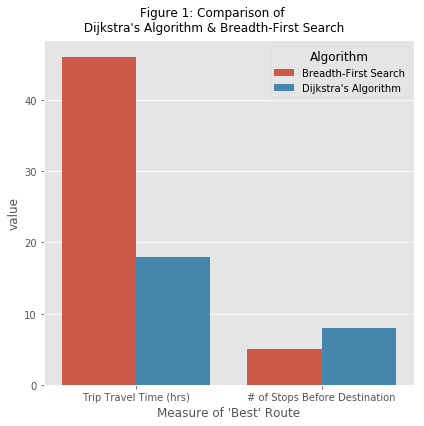

In [131]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
g=sns.catplot(data=melted_df, x= "Measure of 'Best' Route",y='value',
                hue="Algorithm",kind='bar',height=6,aspect=1,
           legend_out=False,margin_titles=True);
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Figure 1: Comparison of\n Dijkstra's Algorithm & Breadth-First Search"); 

In Figure 1, we can see that BFS chose a route that was much longer in terms of trip travel time, but it had fewer number of stops. Dijkstra's Algorithm chose a route that had more stops than the one chosen by BFS, however, the trip travel time was drastically shorter. 

## Executive Summary

In this assignment, we implemented the Breadth First Search (BFS) algorithm and Dijkstra's Algorithm and examined how both methods compute an optimal route in a graph model. We learned last week that the BFS first determines whether or not a path from node A to node B exists, and if yes, it figures out the shortest path from A to B. Similarly, Dijkstra's Algorithm also figures out the shortest path, but additionally takes positive weights into consideration and is useful for weighted graphs. Generally, Dijkstra's algorithm finds the least costly node, checks if there's a cheaper path to the neighbors of this node, if yes, updates their costs, and repeats until this is done for every node in the graph. Then the final path is calculated.      

Our results show that the optimal route chosen by BFS took more than twice as long in terms of driving time (weights), whereas Dijkstra's algorithm chose the path with least amount of weights, or least amount of driving time. In practice, weighted graphs may be more useful in more complex use cases and Dijkstra's algorithm may be a better option for those, whereas BFS works well for unweighted graphs. 
